# 식품

## 마트 수요/매출 예측

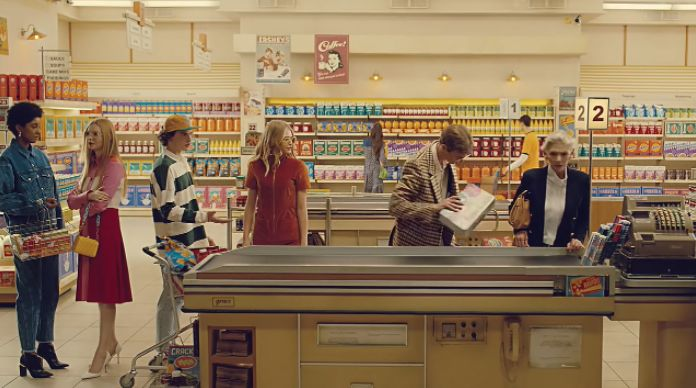

### 📖 목차
- 비즈니스 시나리오
- EDA
- Regression(회귀) 예측

### 💼 비즈니스 시나리오

A마트는 주52시간제 운영으로 인하여 인력난을 겪고 있다. <br>
주 당 판매량을 예측할 수 없기 때문에, 근무 스케줄과 인력 운영을 효율적으로 하기 힘든 상황이다. <br>
대기업 마트가 아니기 때문에 방문자 수, 주차 대수 등 세세한 데이터를 수집할 수 없는 상황이다. <br>
효율적인 인력 운영을 위해서 공공 데이터와, 쉽게 구할 수 있는 데이터를 활용하여 주간 마트 판매량 예측을 통해 인력운영을 효율화 하고자 한다.

#### 🔎 문제 정의

인력 운영 비효율로 인한 운영 비용 상승

#### ✨ 기대 효과

인력 운영 효율화로 인한 운영 비용 절감

#### ✔️ 해결 방안

주간 판매량 예측을 통해 인력 운영 스케줄 조정

#### 🗝️ 성과 측정

주간 판매량 예측량에 따라 스케줄 조정 후, 운영 비용 모니터링

#### ⚙️ 운영

- 1주가 종료되면 차주 판매량을 예측하기 위한 공공데이터 및 내부 데이터 수집
- Data를 Model에 Input후 주간 판매량 추출
- 주간 판매량에 따라 인력 운영 계획 수립

### 🗂️ DATA
- 마케팅 캠페인 관련 데이터

In [23]:
import pandas as pd

df = pd.read_csv('./S_PJT01_DATA.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


### 📍 EDA - 판매 추이 분석

#### 1. 데이터 전처리

- 데이터 기본 정보 확인
    - Data Shape(형태) 확인
    - Data Type 확인
    - Null값 확인
    - Outlier 확인

In [24]:
# Data Shape

print('df', df.shape)

df (6435, 8)


In [25]:
# Data Type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
# Null값 확인

print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [27]:
# Outlier 확인

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [28]:
# Temperature : 화씨온도 > 섭씨온도 변환

df['Temperature'] = (df['Temperature']-32) / 1.8
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.73,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,3.62,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,4.41,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,8.13,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,8.06,2.62,211.35,8.11


In [29]:
df['Temperature'].describe()

count   6435.00
mean      15.92
std       10.25
min      -18.92
25%        8.59
50%       17.04
75%       23.86
max       37.86
Name: Temperature, dtype: float64

In [30]:
# Date : Data Type으로 변경

import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


#### 2. 판매 추이 분석

* 45개의 마트 데이터 (1, 2 등 정수값으로 라벨링)

In [32]:
len(df['Store'].unique())

45

In [33]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11


* 2010-01-10 ~ 2012-12-10 까지의 데이터

In [34]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

* 마트별 판매량 수준 추이의 차이가 있기 때문에 독립적인 모델의 생성이 필요

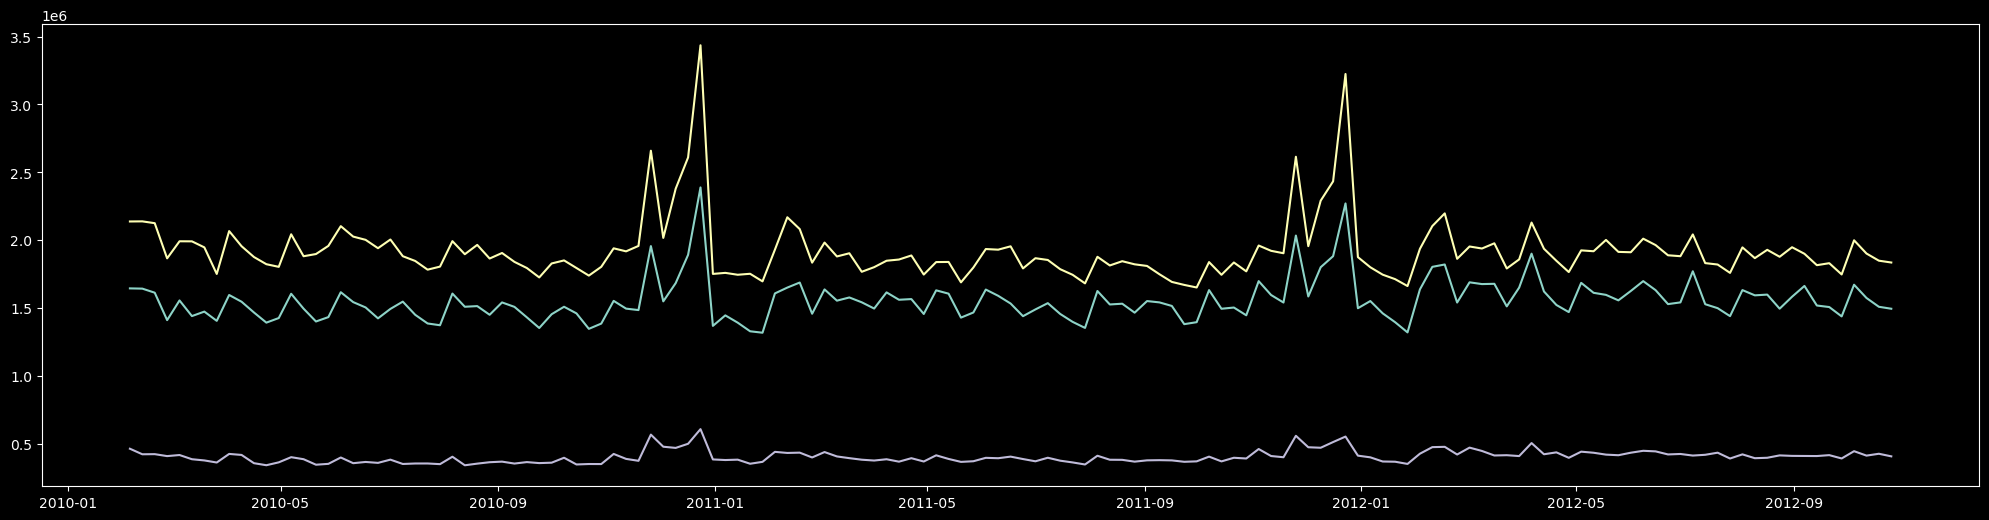

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

# 1번 마트 판매 추이
df1 = df[df['Store']==1].sort_values(by=['Date'])
plt.plot(df1['Date'], df1['Weekly_Sales'], label='Store1');
plt.gcf().set_size_inches(25, 6)

# 2번 마트 판매 추이
df2 = df[df['Store']==2].sort_values(by=['Date'])
plt.plot(df2['Date'], df2['Weekly_Sales'], label='Store2');
plt.gcf().set_size_inches(25, 6)

# 3번 마트 판매 추이
df3 = df[df['Store']==3].sort_values(by=['Date'])
plt.plot(df3['Date'], df3['Weekly_Sales'], label='Store3');
plt.gcf().set_size_inches(25, 6)

In [36]:
# 1번, 2번, 3번 마트의 판매량 수준

df_concat = pd.DataFrame({'Date' : list(df1['Date']),
                          'Store1_Sales' : list(df1['Weekly_Sales']),
                          'Store2_Sales' : list(df2['Weekly_Sales']),
                          'Store3_Sales' : list(df3['Weekly_Sales'])})
df_concat

,Date,Store1_Sales,Store2_Sales,Store3_Sales
0,2010-02-05,1643690.90,2136989.46,461622.22
1,2010-02-12,1641957.44,2137809.50,420728.96
2,2010-02-19,1611968.17,2124451.54,421642.19
3,2010-02-26,1409727.59,1865097.27,407204.86
4,2010-03-05,1554806.68,1991013.13,415202.04
...,...,...,...,...
138,2012-09-28,1437059.26,1746470.56,389813.02
139,2012-10-05,1670785.97,1998321.04,443557.65
140,2012-10-12,1573072.81,1900745.13,410804.39
141,2012-10-19,1508068.77,1847990.41,424513.08


### 📍 EDA - 변수별 매출 영향도 분석

#### 1. 상관관계 분석 (Line Plot)

In [37]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11


* **공휴일** - 공휴일은 매출에 어느정도 영향이 있다

In [38]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0   1041256.38
1   1122887.89
Name: Weekly_Sales, dtype: float64

* **온도** - 온도가 올라가면 판매량이 적어지고 온도가 낮아지면 판매량이 증가하는 약소한 경향

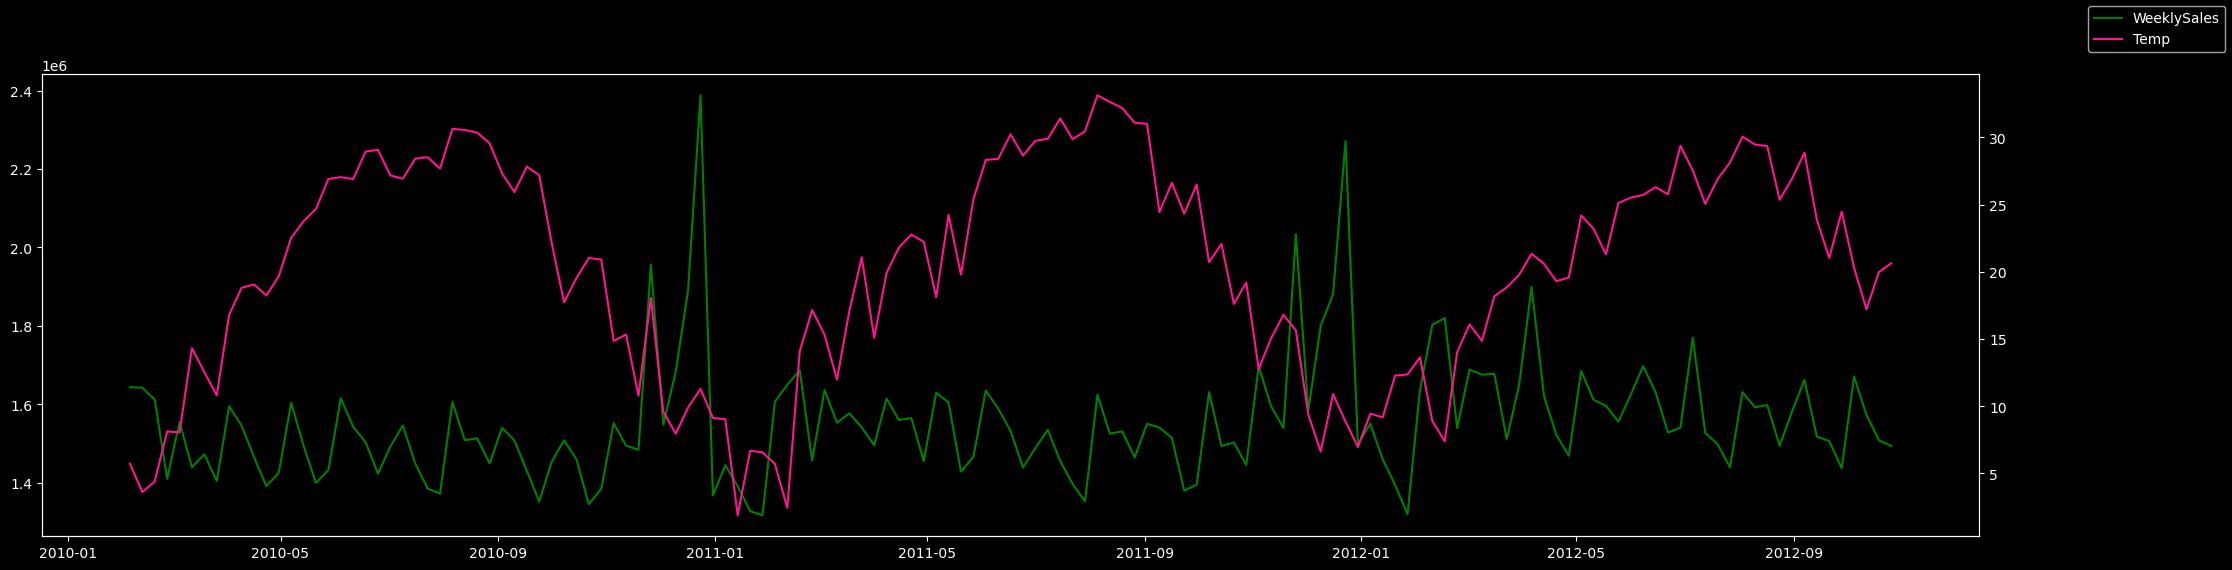

In [39]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

* **연료** - 연료 가격은 2011.01에 큰 가격 변동이 있었으나, 그와 별개로 매출과는 큰 영향이 없다

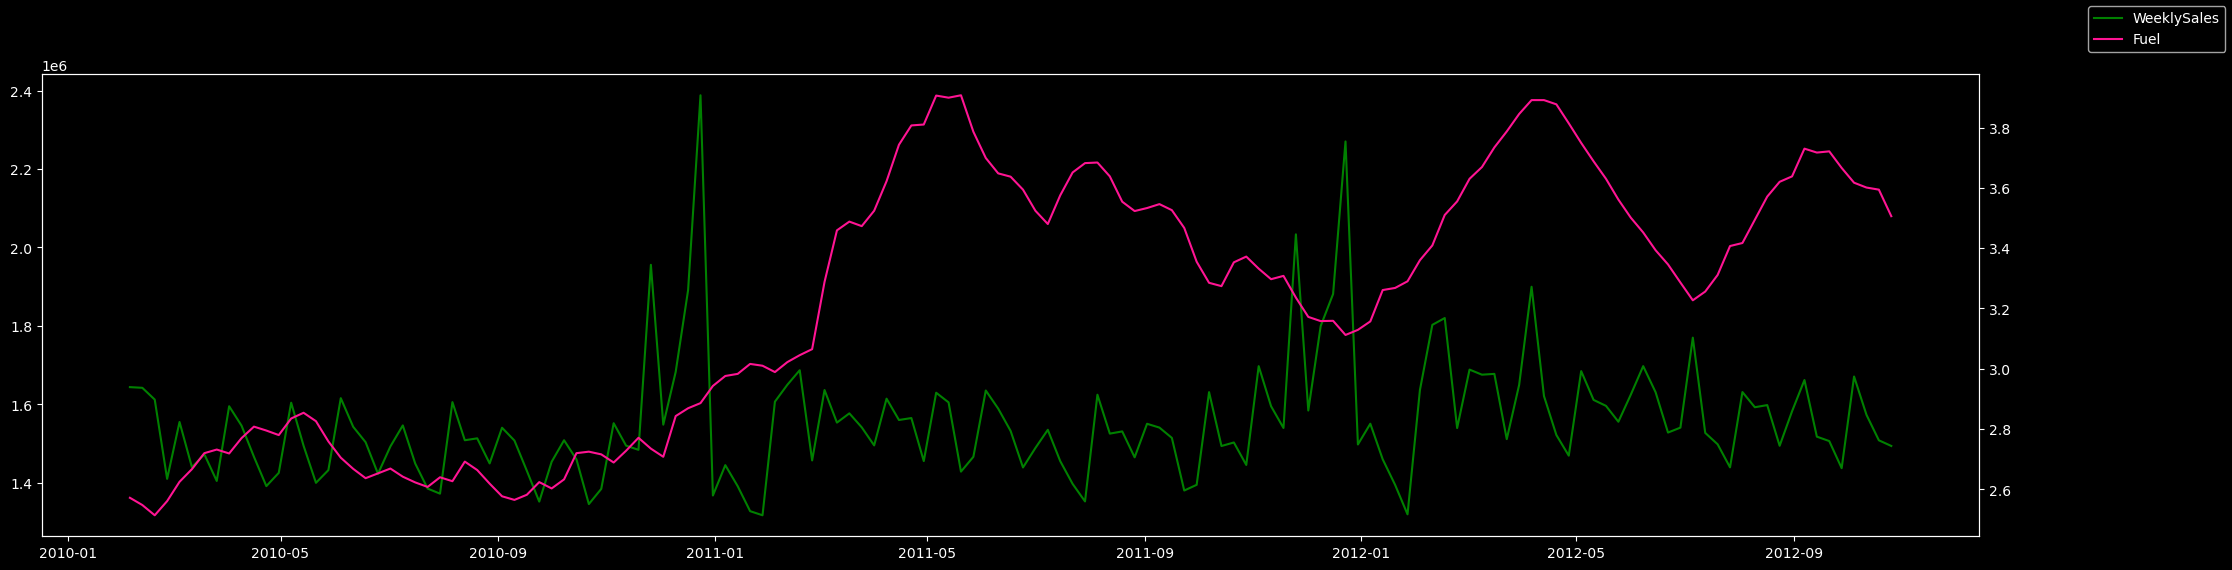

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label= 'WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='deeppink', label='Fuel')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

* **CPI** - CPI도 비슷하게 특정 시점(2011.05)부터 큰 변동을 보이나, 매출과는 큰 영향이 없다

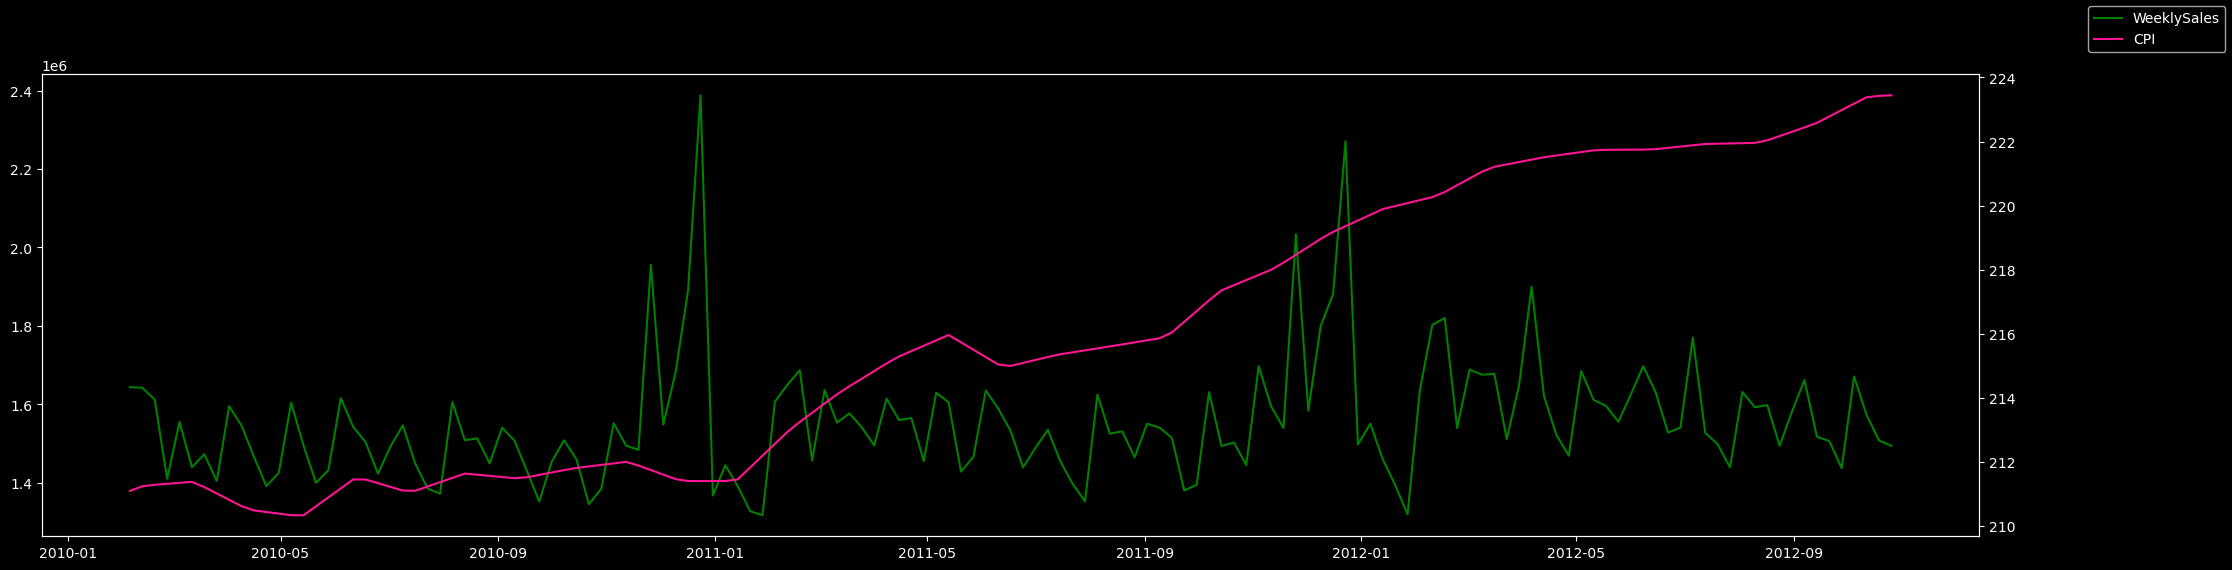

In [41]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='deeppink', label='CPI')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

* **실업률** - 실업률도 비슷하게 특정 시점(2012.01)부터 큰 하락을 보이나, 매출과는 큰 영향이 없다

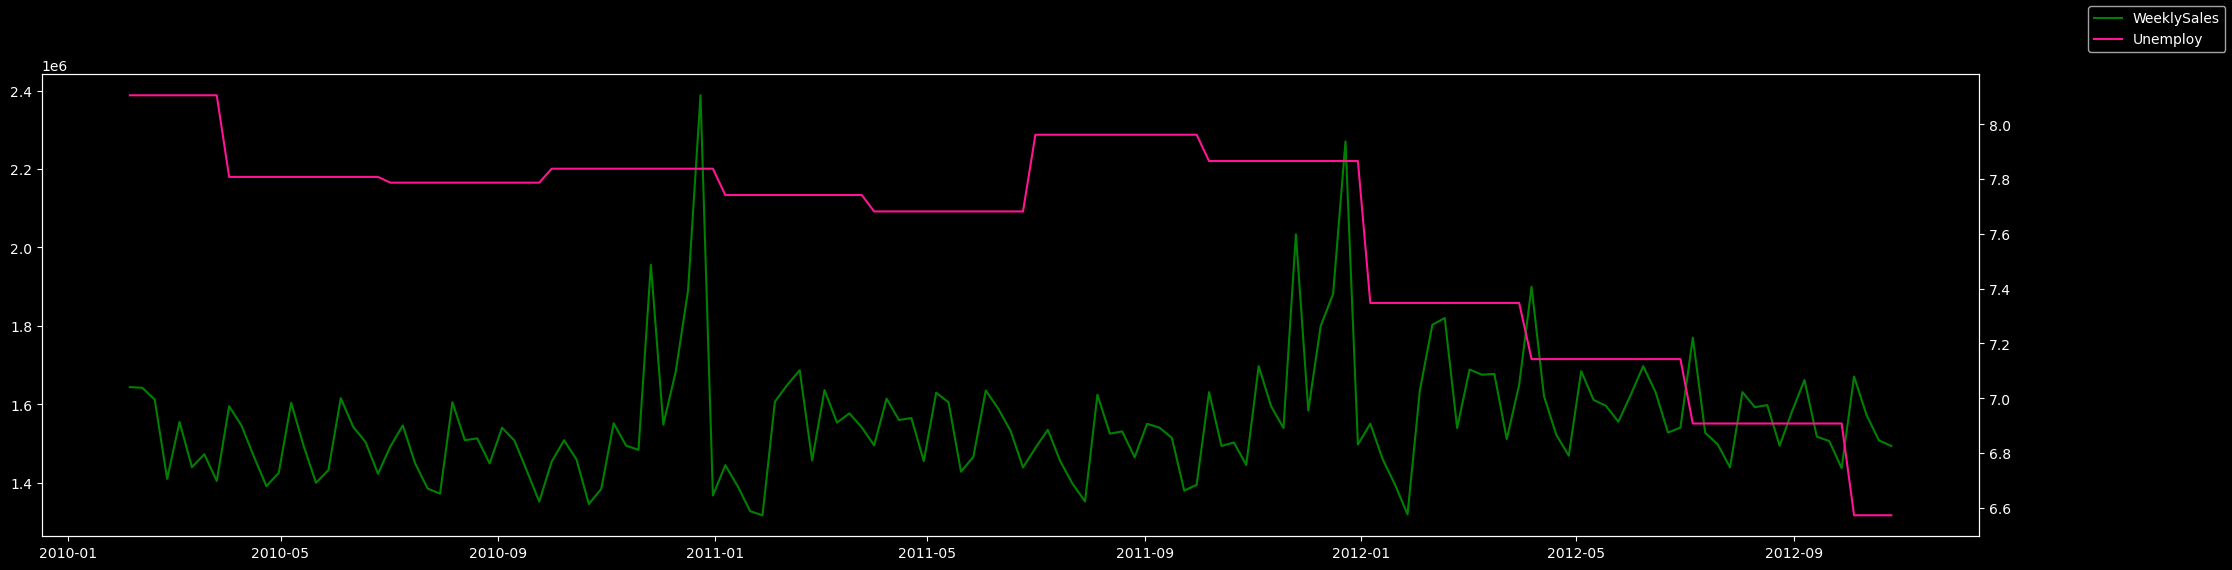

In [42]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='deeppink', label='Unemploy')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

#### 2. 상관관계 분석 (Heat Map)

In [43]:
# 변수 제외
## Store - 매장 내 데이터를 기반으로 하기 위함
## Holiday_Flag - 이진 변수로 상관관계 해석이 제한적
## Date - 날짜 정보라 의미 있는 상관값 제공 X

df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.00,-0.22,0.12,0.23,-0.10
Temperature,-0.22,1.00,0.23,0.12,-0.18
Fuel_Price,0.12,0.23,1.00,0.76,-0.51
CPI,0.23,0.12,0.76,1.00,-0.81
Unemployment,-0.10,-0.18,-0.51,-0.81,1.00


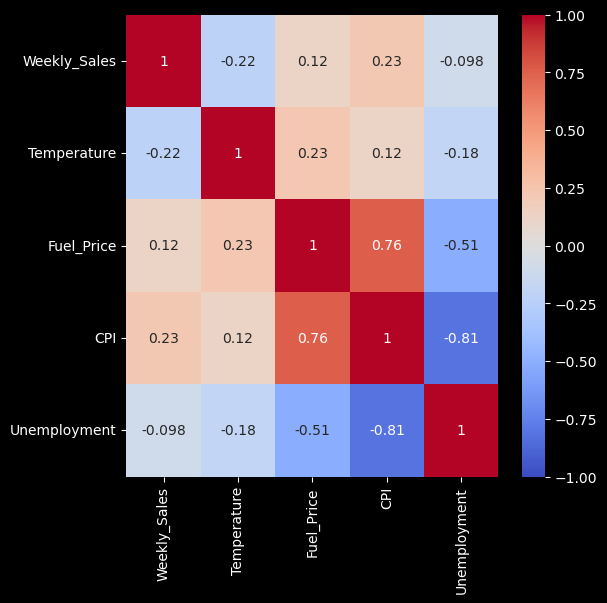

In [44]:
sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(6, 6)

- **온도**와 **주간 판매량** 간의 산점도 (Scatter Plot)
    - 상관계수 -0.22 정도는 큰 음의 상관관계가 있다고 보기 어렵지만
    - 온도가 올라가면 주간 판매량이 낮아지는 어느정도의 경향성 정도는 보인다.

/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


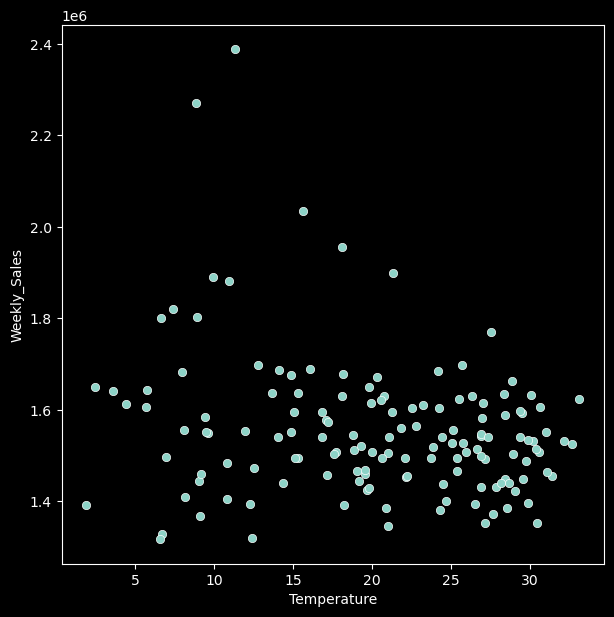

In [45]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

### 📍 ML 매출 예측

#### 1. 모델링을 위한 데이터 준비
- 모델링을 수행하기 위해 Feature와 예측하고자 하는 값인 Y로 데이터를 나눔
- 학습과 예측을 위한 Train / Test set 분할

In [46]:
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11


* **파생 변수 생성**
    - 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용

In [47]:
df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['month'] = df1['Date'].dt.month
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,4,2
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,4,2
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,4,2
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,4,2
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,4,3


* **Fearue(X)** 와 **Y**데이터 구분

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X = df1.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y = df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 6)
(85,)
(58, 6)
(58,)


#### 2. 모델 학습 및 평가
- 모델 : RandomForestRegressor
- 평가 : mae, r2

In [53]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# 학습
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

# 예측
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

# 평가
mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  64858.44739245959
r2_score(r2):  0.6434499510484903

mae_test(mae):  95718.01614272632
r2_score(r2):  0.22774462135745255


* 모델 : Polynomial LinearRegression
* 평가 : mae, r2

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)


mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  101443.77704378834
r2_score(r2):  0.16303378436941374


✔️ RandomForestRegressor
* 표현을 숫자로 변경

In [54]:
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']

result.head(5)

,Real Values,Predicted Values,diff
142,1493659.74,1563583.96,-69924.22
43,1548033.78,1607303.90,-59270.12
29,1449142.92,1481905.78,-32762.86
21,1492418.14,1487801.50,4616.64
77,1352219.79,1517873.22,-165653.43


* xlim과 ylim을 조정해서 선형 Fitting이 잘 되는지를 확인

/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


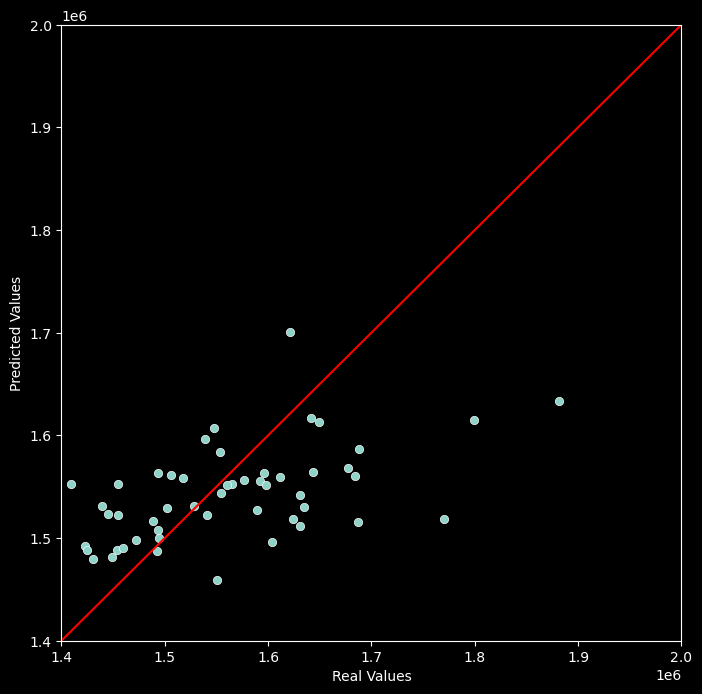

In [55]:
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])

# x축 y축 범위 조정
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

# 선형 회귀 직선 그리기
x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')

plt.gcf().set_size_inches(8 ,8)

* 실제값과 예측값 Plotting
* peak를 맞추지 못함

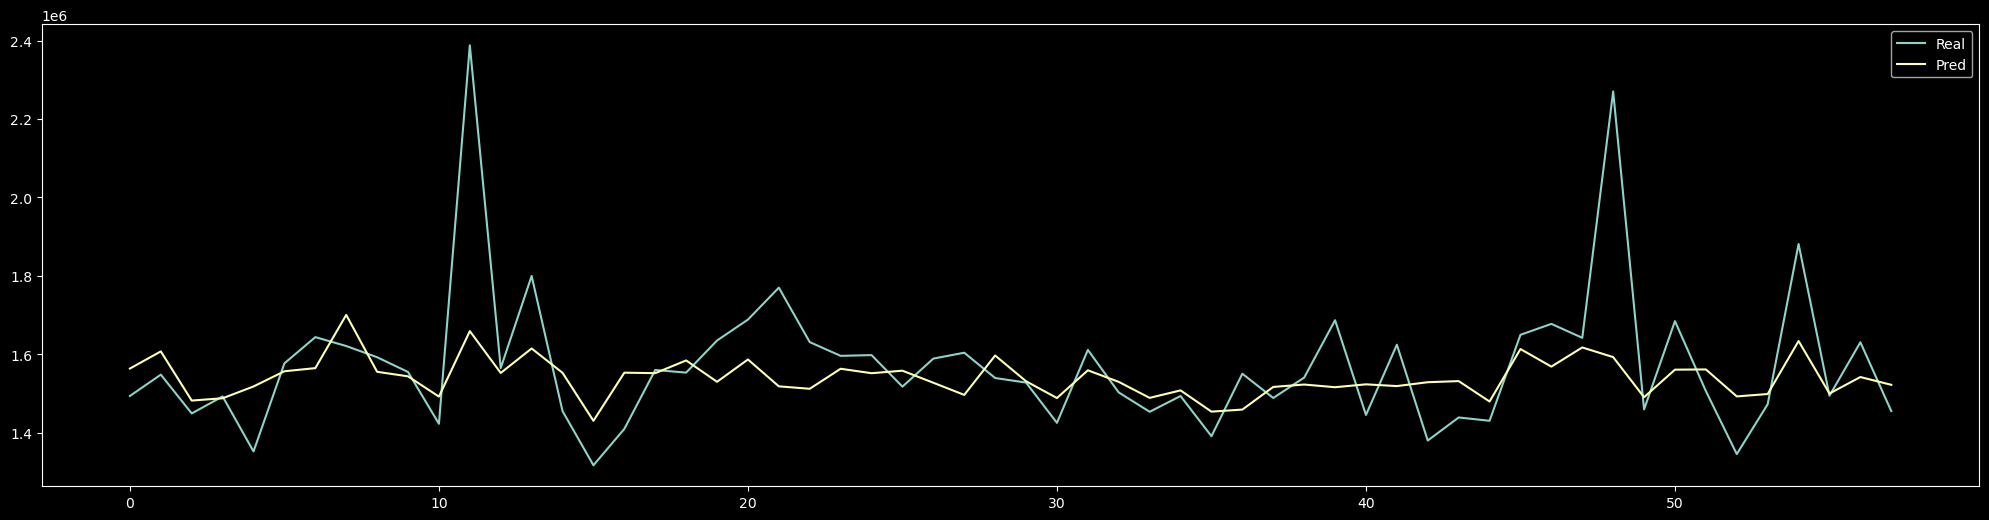

In [56]:
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='Real');
plt.plot(result.index, result['Predicted Values'], label='Pred');
plt.legend()
plt.gcf().set_size_inches(25, 6)

#### 3. 중요 변수 파악

/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/euijinlee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


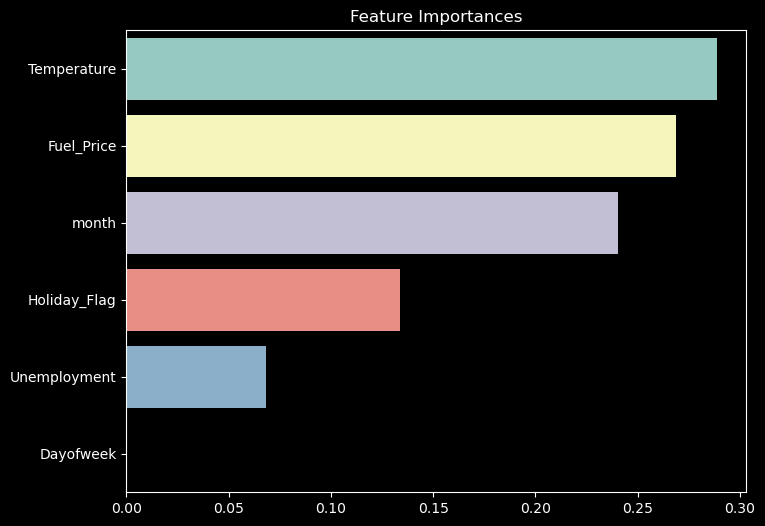

In [57]:
ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#### 4. 모델 Save and Read

In [58]:
import pickle

# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)